In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#importing data
df = pd.read_csv('c:\\Users\\ashra\\OneDrive\\Desktop\\Modified_Airline_Reviews_Dataset_with_Flight_ID.csv' )
df.index = df.index+1

In [13]:
#printing the first 5 rows
df.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Class,Seat Comfort,...,Inflight Entertainment,Value For Money,Overall Rating,Recommended,From,To,Location,Review_ID,Passenger_ID,Flight_ID
1,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Business Class,4,...,4,4,9,yes,Jakarta,Singapore,Jakarta,R1B,P1B,F1
2,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Economy Class,5,...,4,1,3,no,Phuket,Singapore,Phuket,R2C,P2C,F2
3,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Economy Class,1,...,1,5,10,yes,Siem Reap,Singapore,Siem Reap,R3D,P3D,F3
4,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Economy Class,5,...,5,5,10,yes,Singapore,London Heathrow,Singapore,R4E,P4E,F4
5,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Economy Class,5,...,5,5,10,yes,Singapore,Phnom Penh,Singapore,R5F,P5F,F5


In [23]:
# checking for null values and spliting the route column into 'from'and 'to'
df.isnull(df['Route'])
df[['From', 'To']] = df['Route'].str.split(' to ',n=1, expand = True) 

TypeError: DataFrame.isnull() takes 1 positional argument but 2 were given

In [21]:
# displaying 'from' and 'to' columns
df.head(10)[['From', 'To']]

,From,To
1,Jakarta,Singapore
2,Phuket,Singapore
3,Siem Reap,Singapore
4,Singapore,London Heathrow
5,Singapore,Phnom Penh
6,Singapore,Cairns
7,Singapore,Frankfurt
8,Singapore,Bandar Seri Begawan
9,Singapore,Jakarta
10,Siem Reap,Singapore


In [43]:
#checking for null values in primary keys
columns_to_check = ['Review_ID', 'Passenger_ID', 'Flight_ID']
null_report = {}
for column in columns_to_check:
    null_count = df[column].isnull().sum()  
    if null_count > 0:
        null_report[column] = f"{null_count} null value(s) found"
    else:
        null_report[column] = "No null values found"
null_report_df = pd.DataFrame.from_dict(null_report, orient='index', columns=['Presence of Nulls'])
print(null_report_df)

                 Presence of Nulls
Review_ID     No null values found
Passenger_ID  No null values found
Flight_ID     No null values found


In [25]:
#checking for missing values 
df.isnull().sum()

Title                     0
Name                      0
Review Date               0
Airline                   0
Verified                  0
Reviews                   0
Type of Traveller         0
Month Flown               0
Class                     0
Seat Comfort              0
Staff Service             0
Food & Beverages          0
Inflight Entertainment    0
Value For Money           0
Overall Rating            0
Recommended               0
From                      0
To                        0
Location                  0
Review_ID                 0
Passenger_ID              0
Flight_ID                 0
dtype: int64

In [29]:
#dropping rows with missing values and displaying data
df_cleaned = df.dropna()
df



,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Class,Seat Comfort,...,Inflight Entertainment,Value For Money,Overall Rating,Recommended,From,To,Location,Review_ID,Passenger_ID,Flight_ID
1,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Business Class,4,...,4,4,9,yes,Jakarta,Singapore,Jakarta,R1B,P1B,F1
2,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Economy Class,5,...,4,1,3,no,Phuket,Singapore,Phuket,R2C,P2C,F2
3,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Economy Class,1,...,1,5,10,yes,Siem Reap,Singapore,Siem Reap,R3D,P3D,F3
4,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Economy Class,5,...,5,5,10,yes,Singapore,London Heathrow,Singapore,R4E,P4E,F4
5,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Economy Class,5,...,5,5,10,yes,Singapore,Phnom Penh,Singapore,R5F,P5F,F5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8089,an uneventful flight,N Vickers,2016-06-20,Korean Air,True,"KE124, Brisbane to Incheon (A330) and KE867,...",Business,June 2016,Economy Class,5,...,3,4,7,yes,BNE,ULN via ICN,BNE,R8089D,P8089D,F8089
8090,Korean Air always impresses,Kim Holloway,2016-06-12,Korean Air,False,Our recent flight was our fourth trip to the...,Couple Leisure,June 2016,Economy Class,3,...,4,5,10,yes,SYD,LHR via ICN,SYD,R8090E,P8090E,F8090
8091,didn’t offer anything,C Clark,2016-06-06,Korean Air,True,I flew Korean Air from Bali to Seoul in Pres...,Business,April 2016,Business Class,4,...,5,1,2,no,DPS,ICN,DPS,R8091F,P8091F,F8091
8092,appreciated the service onboard,E Petan,2016-04-21,Korean Air,False,Seoul to Paris with Korean Air. I am traveli...,Business,April 2016,Business Class,5,...,4,5,10,yes,ICN,CDG,ICN,R8092G,P8092G,F8092


In [49]:

cleaned = df.dropna(subset = ['From'],inplace = True)
cleaned

In [47]:
df.isna().sum()

Title                     0
Name                      0
Review Date               0
Airline                   0
Verified                  0
Reviews                   0
Type of Traveller         0
Month Flown               0
Route                     0
Class                     0
Seat Comfort              0
Staff Service             0
Food & Beverages          0
Inflight Entertainment    0
Value For Money           0
Overall Rating            0
Recommended               0
From                      0
To                        0
Location                  0
dtype: int64

In [35]:
#checking for duplicates and handling them
df_cleaned = df.drop_duplicates()
df.duplicated().sum


<bound method Series.sum of 1       False
2       False
3       False
4       False
5       False
        ...  
8089    False
8090    False
8091    False
8092    False
8093    False
Length: 8093, dtype: bool>

In [53]:
# droping the route column
c = df.drop('Route', axis=1, inplace= True)


,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,From,To,Location
1,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Business Class,4,4,4,4,4,9,yes,Jakarta,Singapore,Jakarta
2,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Economy Class,5,3,4,4,1,3,no,Phuket,Singapore,Phuket
3,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Economy Class,1,5,2,1,5,10,yes,Siem Reap,Singapore,Siem Reap
4,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Economy Class,5,5,5,5,5,10,yes,Singapore,London Heathrow,Singapore
5,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Economy Class,5,5,5,5,5,10,yes,Singapore,Phnom Penh,Singapore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,an uneventful flight,N Vickers,2016-06-20,Korean Air,True,"KE124, Brisbane to Incheon (A330) and KE867,...",Business,June 2016,Economy Class,5,4,5,3,4,7,yes,BNE,ULN via ICN,BNE
8097,Korean Air always impresses,Kim Holloway,2016-06-12,Korean Air,False,Our recent flight was our fourth trip to the...,Couple Leisure,June 2016,Economy Class,3,5,5,4,5,10,yes,SYD,LHR via ICN,SYD
8098,didn’t offer anything,C Clark,2016-06-06,Korean Air,True,I flew Korean Air from Bali to Seoul in Pres...,Business,April 2016,Business Class,4,5,5,5,1,2,no,DPS,ICN,DPS
8099,appreciated the service onboard,E Petan,2016-04-21,Korean Air,False,Seoul to Paris with Korean Air. I am traveli...,Business,April 2016,Business Class,5,1,3,4,5,10,yes,ICN,CDG,ICN


             Presence of Zeros
Review_ID       No zeros found
Passenger_ID    No zeros found
Flight_ID       No zeros found


In [54]:
df.to_csv('Air.csv', index = False)

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Class,Seat Comfort,...,Inflight Entertainment,Value For Money,Overall Rating,Recommended,From,To,Location,Review_ID,Passenger_ID,Flight_ID
1,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Business Class,4,...,4,4,9,yes,Jakarta,Singapore,Jakarta,R1B,P1B,F1
2,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Economy Class,5,...,4,1,3,no,Phuket,Singapore,Phuket,R2C,P2C,F2
3,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Economy Class,1,...,1,5,10,yes,Siem Reap,Singapore,Siem Reap,R3D,P3D,F3
4,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Economy Class,5,...,5,5,10,yes,Singapore,London Heathrow,Singapore,R4E,P4E,F4
5,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Economy Class,5,...,5,5,10,yes,Singapore,Phnom Penh,Singapore,R5F,P5F,F5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8089,an uneventful flight,N Vickers,2016-06-20,Korean Air,True,"KE124, Brisbane to Incheon (A330) and KE867,...",Business,June 2016,Economy Class,5,...,3,4,7,yes,BNE,ULN via ICN,BNE,R8089D,P8089D,F8089
8090,Korean Air always impresses,Kim Holloway,2016-06-12,Korean Air,False,Our recent flight was our fourth trip to the...,Couple Leisure,June 2016,Economy Class,3,...,4,5,10,yes,SYD,LHR via ICN,SYD,R8090E,P8090E,F8090
8091,didn’t offer anything,C Clark,2016-06-06,Korean Air,True,I flew Korean Air from Bali to Seoul in Pres...,Business,April 2016,Business Class,4,...,5,1,2,no,DPS,ICN,DPS,R8091F,P8091F,F8091
8092,appreciated the service onboard,E Petan,2016-04-21,Korean Air,False,Seoul to Paris with Korean Air. I am traveli...,Business,April 2016,Business Class,5,...,4,5,10,yes,ICN,CDG,ICN,R8092G,P8092G,F8092


In [ ]:
#visulization

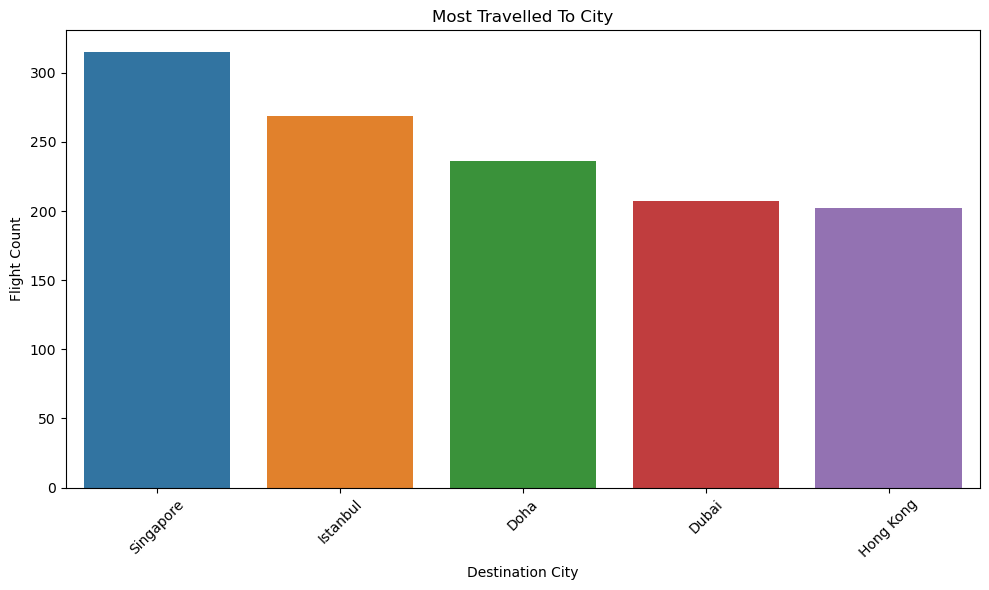

In [67]:
data = {
    'To_City': ['Singapore', 'Istanbul', 'Doha', 'Dubai', 'Hong Kong'],
    'flight_count': [315, 269, 236, 207, 202]
}
df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
sns.barplot(x='To_City', y='flight_count', data=df, hue='To_City', dodge=False, legend=False)
plt.title('Most Travelled To City')
plt.xlabel('Destination City')
plt.ylabel('Flight Count')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


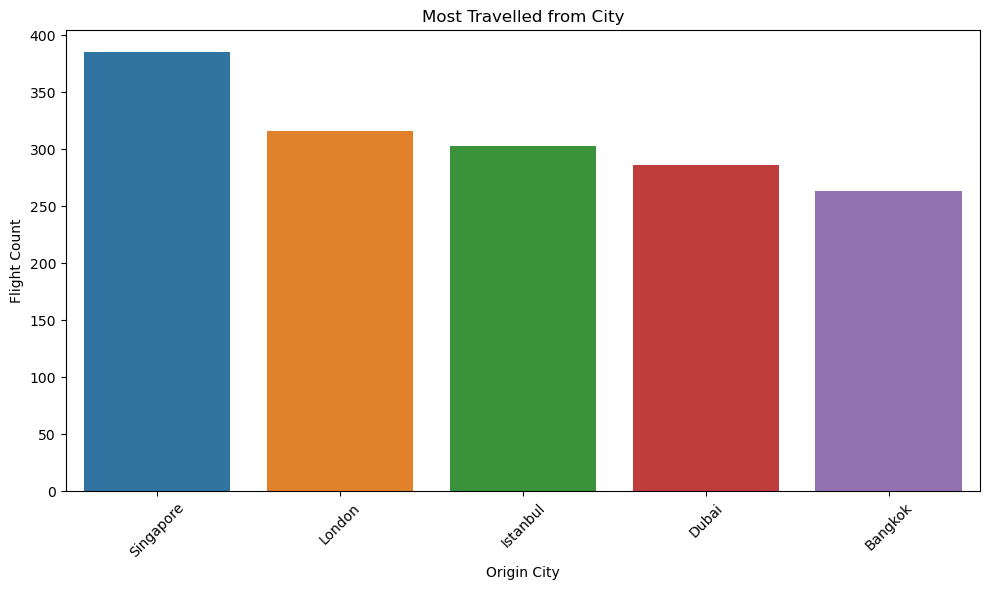

In [107]:
data = {
    'From_City': ['Singapore', 'London', 'Istanbul', 'Dubai', 'Bangkok'],
    'flight_count': [385, 316, 303, 286, 263]
}
df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
sns.barplot(x='From_City', y='flight_count', data=df, hue='From_City', dodge=False, legend=False)
plt.title('Most Travelled from City')
plt.xlabel('Origin City')
plt.ylabel('Flight Count')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

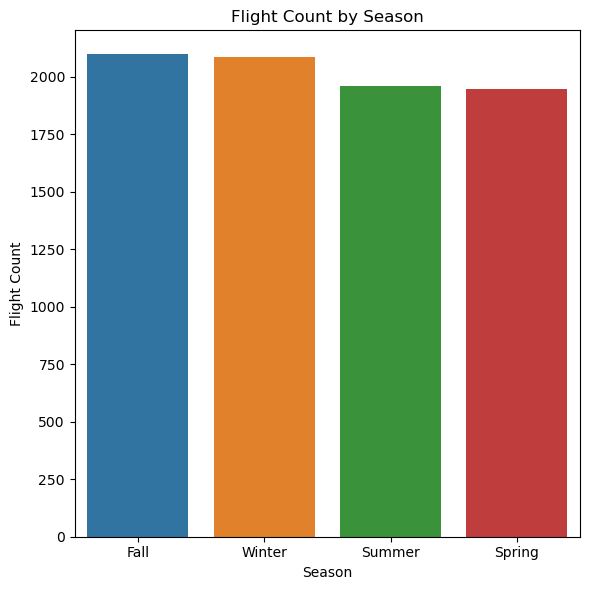

In [79]:
data = {
    'Season': ['Fall', 'Winter', 'Summer', 'Spring'],
    'flight_count': [2097, 2088, 1960, 1948]
}

df = pd.DataFrame(data)

# Step 2: Create a bar plot for the flight count per season
plt.figure(figsize=(6, 6))
sns.barplot(x='Season', y='flight_count', data=df, hue='Season', dodge=False, legend=False)

# Step 3: Customize the plot
plt.title('Flight Count by Season')
plt.xlabel('Season')
plt.ylabel('Flight Count')

# Step 4: Display the plot
plt.tight_layout()
plt.show()


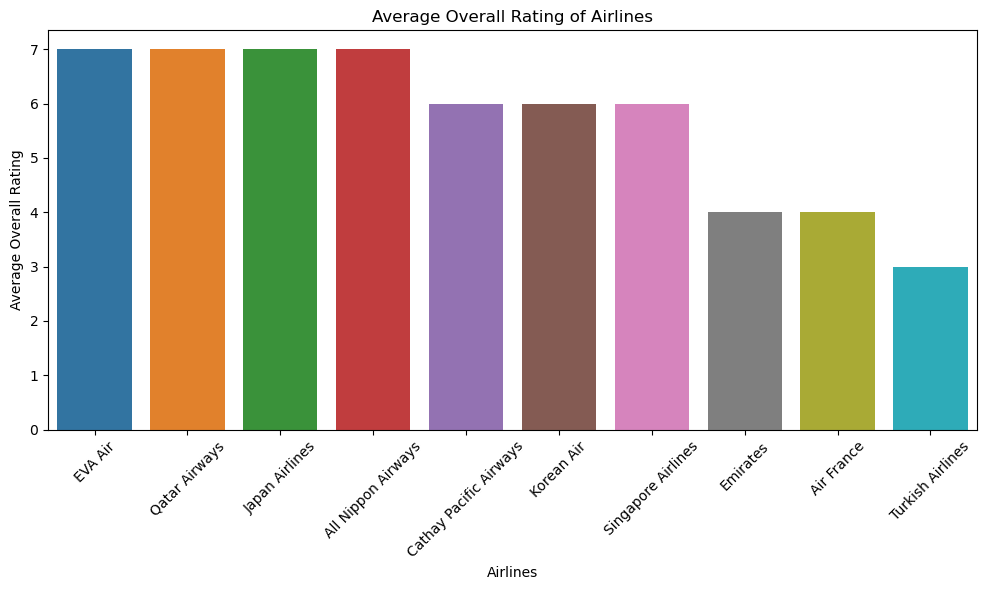

In [89]:
data = {
    'Airlines': ['EVA Air', 'Qatar Airways', 'Japan Airlines', 'All Nippon Airways', 
                 'Cathay Pacific Airways', 'Korean Air', 'Singapore Airlines', 
                 'Emirates', 'Air France', 'Turkish Airlines'],
    'avg_overall_rating': [7, 7, 7, 7, 6, 6, 6, 4, 4, 3]
}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Airlines', y='avg_overall_rating', data=df, hue='Airlines', dodge=False, legend=False)
plt.title('Average Overall Rating of Airlines')
plt.xlabel('Airlines')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


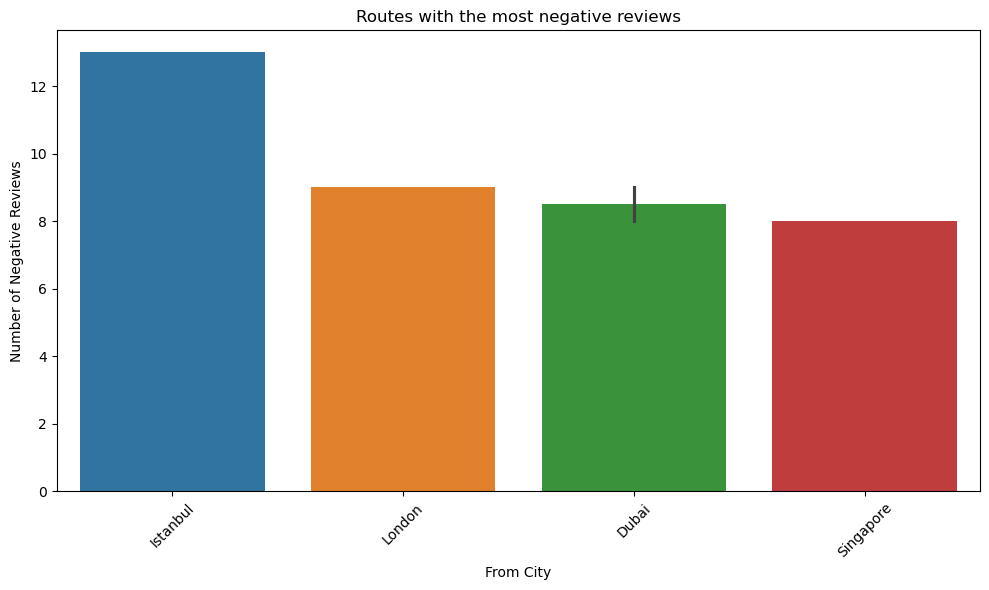

In [99]:
data = {
    'From_City': ['Istanbul', 'London', 'Dubai', 'Singapore', 'Dubai'],
    'To_City': ['London', 'Istanbul', 'London', 'Istanbul', 'Manchester'],
    'negative_reviews': [13, 9, 9, 8, 8]
}
df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
sns.barplot(x='From_City', y='negative_reviews', hue='From_City', data=df, dodge=False)
plt.title('Routes with the most negative reviews')
plt.xlabel('From City')
plt.ylabel('Number of Negative Reviews')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

C:\Users\ashra\AppData\Local\Temp\ipykernel_17292\3319055682.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='avg_rating', data=df, palette='coolwarm')


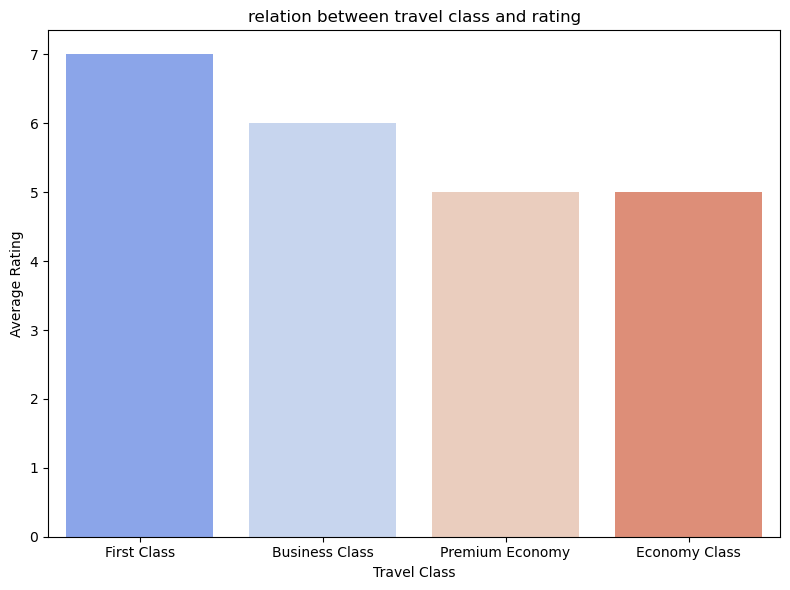

In [109]:
data = {
    'Class': ['First Class', 'Business Class', 'Premium Economy', 'Economy Class'],
    'avg_rating': [7, 6, 5, 5]
}
df = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
sns.barplot(x='Class', y='avg_rating', data=df, palette='coolwarm')
plt.title('relation between travel class and rating')
plt.xlabel('Travel Class')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()
